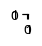

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
f,a = plt.subplots(1,1,figsize=(1e-2, 1e-2))
mpl.rcParams['figure.dpi'] = 180
sns.set_style('darkgrid')
import os,sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")
import itertools
from tqdm.auto import tqdm
from datetime import datetime as dt
from src.utils import mkdirs, convert_path, pkl_dump, pkl_load, display_side, add_median_labels, get_palette

PAL = sns.color_palette('hsv', n_colors=13)
HSV = [PAL[-4], PAL[-1], PAL[0], PAL [4]]
tmppal = sns.color_palette('hsv', n_colors=15)
NEWPAL = HSV + [tmppal[-3], tmppal[7]]
mpl.rcParams['figure.dpi'] = 180

In [3]:
df = pd.read_excel('../data/aligned_icore/231017_zeynep_extra_data_neoepitopes.xlsx')
df.rename(columns={'Sequence':'Peptide', 'Ref.Sequence':'wild_type', 'gene_TPM':'Total_Gene_TPM'}, inplace=True)
df.head(2)

,pat,gene_name,hgvs_dna,hgvs_protein,variant_id,Peptide,wild_type,nrm_alt_freq,tum_alt_freq,rna_alt_freq,Total_Gene_TPM,IFNg,IL5,any,both
0,Hu_048,'ATRX,c.5390T>C,p.Val1797Ala,1328383,STMVDARVMKKRAHILYEML,STMVDVRVMKKRAHILYEML,0.0,0.6797,0.8957,144.452,True,True,True,True
1,Hu_048,'ATRX,c.5390T>C,p.Val1797Ala,1328383,PIQNGQCADSTMVDARVMKK,PIQNGQCADSTMVDVRVMKK,0.0,0.6797,0.8957,144.452,False,False,False,False


In [498]:
def get_in_ref(peptide, hla, ref):
    return len(ref.query('Peptide==@peptide and HLA == @hla'))==1

In [502]:
cedar['in_prime'] = cedar.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], prime), axis=1)

In [504]:
cedar = pd.read_csv('../data/pepx/230308_cedar_aligned_pepx_fold.csv').assign(in_cedar = True, db = 'cedar')
prime = pd.read_csv('../data/pepx/230308_prime_aligned_pepx.csv').assign(in_prime = True, db = 'prime')
nepdb = pd.read_csv('../data/pepx/230308_nepdb_aligned_pepx.csv').assign(in_nepdb = True, db = 'nepdb')
prime_filt = prime.query('Peptide not in @cedar.Peptide.unique()')

cedar['in_prime'] = cedar.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], prime), axis=1)
cedar['in_nepdb'] = cedar.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], nepdb), axis=1)

prime['in_cedar'] = prime.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], cedar), axis=1)
prime['in_nepdb'] = prime.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], nepdb), axis=1)

nepdb['in_prime'] = nepdb.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], prime), axis=1)
nepdb['in_cedar'] = nepdb.apply(lambda x: get_in_ref(x['Peptide'], x['HLA'], cedar), axis=1)

# cedar['cedar_id'] = [f'cedar_{i:04}' for i in range(len(cedar))]
# cedar['nepdb_id'] = 'flagged'
# cedar['prime_id'] = 'flagged'

# prime['cedar_id'] = 'flagged'
# prime['prime_id'] = [f'prime_{i:04}' for i in range(len(prime))]
# prime['nepdb_id'] = 'flagged'

# nepdb['cedar_id'] = 'flagged'
# nepdb['prime_id'] = 'flagged'
# nepdb['nepdb_id'] = [f'nepdb_{i:04}' for i in range(len(nepdb))]


# Remake merged dataset

In [500]:
len(prime.query('Peptide=="FICAIIVVV" and HLA=="HLA-B2705"'))==1

False

In [496]:
prime.query('Peptide=="FICAIIVVV" or Peptide=="FLGAGLFLYF"')[['Peptide','HLA', 'agg_label', 'in_prime', 'in_cedar']]

,Peptide,HLA,agg_label,in_prime,in_cedar
458,FICAIIVVV,HLA-A0201,1,True,True
508,FLGAGLFLYF,HLA-A0201,1,True,True


In [497]:
cedar.query('Peptide=="FICAIIVVV" or Peptide=="FLGAGLFLYF"')[['Peptide','HLA', 'agg_label', 'in_prime', 'in_cedar']]

,Peptide,HLA,agg_label,in_prime,in_cedar
435,FICAIIVVV,HLA-B2705,1,True,True
482,FLGAGLFLYF,HLA-B2705,1,True,True


In [492]:
cp_merged.query('Peptide=="FICAIIVVV" or Peptide=="FLGAGLFLYF"')

,Peptide,HLA,EL_rank_mut,agg_label,EL_rank_wt,EL_rank_wt_aligned,Total_Gene_TPM,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,VHSE1,...,len_icore_mut,seq_id,trueHLA_EL_rank,wild_type,foreignness_score,ratio_rank,in_cedar,db,in_prime,in_nepdb
818,FICAIIVVV,HLA-A0201,1.2167,1,0.4979,0.4979,7.70076,7.701,6.299,0.882222,...,9,seq_0818,1.2167,FIGAIIVVV,0.000000e+00,1.756505,True,prime,True,False
819,FICAIIVVV,HLA-B2705,31.8000,1,39.2000,39.2000,7.70076,7.701,6.299,0.882222,...,9,seq_0819,31.8000,FIGAIIVVV,0.000000e+00,6.003061,True,cedar,True,False
910,FLGAGLFLYF,HLA-B2705,14.9934,1,16.7423,21.9474,211.50600,211.506,123.178,0.831111,...,9,seq_0910,26.1579,FLGAGLFIYF,3.475804e-09,4.750636,True,cedar,True,False
911,FLGAGLFLYF,HLA-A0201,1.7144,1,3.2829,3.2829,211.50600,211.506,123.178,0.858750,...,8,seq_0911,5.9479,FLGAGLFIYF,3.475804e-09,0.819104,True,prime,True,False


In [490]:
for i, row in cp_merged.query('in_cedar').iterrows():
    pep=row['Peptide']
    hla=row['HLA']
    if len(cedar.query("Peptide==@pep and HLA==@hla")) != 1 :
        print(i, row[['Peptide', 'HLA', 'agg_label', 'in_prime', 'in_cedar']], '\n')

818 Peptide      FICAIIVVV
HLA          HLA-A0201
agg_label            1
in_prime          True
in_cedar          True
Name: 818, dtype: object 

911 Peptide      FLGAGLFLYF
HLA           HLA-A0201
agg_label             1
in_prime           True
in_cedar           True
Name: 911, dtype: object 



In [487]:
for i, row in cp_merged.query('in_prime').iterrows():
    pep=row['Peptide']
    hla=row['HLA']
    if len(prime.query("Peptide==@pep and HLA==@hla")) != 1 :
        print(i, row[['Peptide', 'HLA', 'agg_label', 'in_prime', 'in_cedar']], '\n')

93 Peptide      ALAQKGVQL
HLA          HLA-B0702
agg_label            0
in_prime          True
in_cedar          True
Name: 93, dtype: object 

819 Peptide      FICAIIVVV
HLA          HLA-B2705
agg_label            1
in_prime          True
in_cedar          True
Name: 819, dtype: object 

910 Peptide      FLGAGLFLYF
HLA           HLA-B2705
agg_label             1
in_prime           True
in_cedar           True
Name: 910, dtype: object 

963 Peptide      FLMASISSF
HLA          HLA-B3501
agg_label            0
in_prime          True
in_cedar          True
Name: 963, dtype: object 

964 Peptide      FLMASISSF
HLA          HLA-B0702
agg_label            0
in_prime          True
in_cedar          True
Name: 964, dtype: object 

1020 Peptide      FLVYGVRPGM
HLA           HLA-B1501
agg_label             0
in_prime           True
in_cedar           True
Name: 1020, dtype: object 

2238 Peptide      KQWLVWLFL
HLA          HLA-A0201
agg_label            1
in_prime          True
in_cedar         

In [505]:
cp_merged = pd.concat([cedar, prime]).drop(columns=['Unnamed: 0.1' ,'Unnamed: 0','fold']).sort_values('Peptide').reset_index(drop=True)
cpn_merged = pd.concat([cedar, prime, nepdb]).drop(columns=['Unnamed: 0.1' ,'Unnamed: 0', 'fold', 'EL_rank_exp']).sort_values('Peptide').reset_index(drop=True)

In [440]:
cp_merged['newdb'] = cp_merged.apply(lambda x: get_db(x['in_cedar'], x['in_prime'],  x['in_nepdb']), axis=1)

In [506]:
cp_merged = cp_merged.drop_duplicates(subset=['Peptide','HLA','agg_label'])
cpn_merged = cpn_merged.drop_duplicates(subset=['Peptide','HLA','agg_label'])

cp_merged.loc[cp_merged.duplicated(subset=['Peptide','HLA'], keep=False), ['agg_label']]=1
cpn_merged.loc[cpn_merged.duplicated(subset=['Peptide','HLA'], keep=False), ['agg_label']]=1
cp_merged = cp_merged.drop_duplicates(subset=['Peptide','HLA', 'agg_label']).sort_values('Peptide').reset_index(drop=True)
cpn_merged = cpn_merged.drop_duplicates(subset=['Peptide','HLA', 'agg_label']).sort_values('Peptide').reset_index(drop=True)
print(len(cp_merged), len(cpn_merged))
cp_merged['seq_id']= [f'seq_{i:04}' for i in range(len(cp_merged))]
cpn_merged['seq_id']= [f'seq_{i:04}' for i in range(len(cpn_merged))]
cp_merged['Peptide'].to_csv('../../kern_dist/data/231018_cp_merged.pep', index=False, header=False)
cpn_merged['Peptide'].to_csv('../../kern_dist/data/231018_cpn_merged.pep', index=False, header=False)

5581 5651


In [509]:
from src.partition_tools import pipeline_stratified_kfold
cp_merged_fold = pipeline_stratified_kfold('../../kern_dist/out/231018_cp_merged.pep_0.9.out', cp_merged, k=10, elrank_col='EL_rank_mut').drop_duplicates(subset=['seq_id'])
cpn_merged_fold = pipeline_stratified_kfold('../../kern_dist/out/231018_cpn_merged.pep_0.9.out', cpn_merged, k=10, elrank_col='EL_rank_mut').drop_duplicates(subset=['seq_id'])

start 5581
read hobohm 4134 1529
strat kfold unique 4134 1529
manually reassign identical 4134 1529
manually reassign related 4134 1529
concat 5663
merge 5663
drop duplicated 5581
start 5651
read hobohm 4175 1563
strat kfold unique 4175 1563
manually reassign identical 4175 1563
manually reassign related 4175 1563
concat 5738
merge 5738
drop duplicated 5651


In [510]:
print(len(cp_merged_fold), len(cpn_merged_fold))

5581 5651


In [511]:
from src.mutation_tools import pipeline_mutation_scores
from src.data_processing import get_aa_properties
cp_merged_fold = pipeline_mutation_scores(cp_merged_fold, 'icore_mut', 'icore_wt_aligned', ics_kl, 0.2, prefix='icore_')
cp_merged_fold, _ = get_aa_properties(cp_merged_fold, seq_col = 'icore_mut', do_vhse=False, prefix='icore_')
cpn_merged_fold = pipeline_mutation_scores(cpn_merged_fold, 'icore_mut', 'icore_wt_aligned', ics_kl, 0.2, prefix='icore_')
cpn_merged_fold, _ = get_aa_properties(cpn_merged_fold, seq_col  = 'icore_mut', do_vhse=False, prefix='icore_')
cp_merged_fold['ratio_rank'] = cp_merged_fold.apply(lambda x: abs(x['EL_rank_mut']-x['EL_rank_wt_aligned']) * x['EL_rank_mut'] / x['EL_rank_wt_aligned'], axis=1)
cpn_merged_fold['ratio_rank'] = cpn_merged_fold.apply(lambda x: abs(x['EL_rank_mut']-x['EL_rank_wt_aligned']) * x['EL_rank_mut'] / x['EL_rank_wt_aligned'], axis=1)

In [515]:
cp_merged_fold['flag']=True
cpn_merged_fold['flag']=True

In [521]:
cp_merged_fold.query('not in_nepdb').drop(columns=['in_nepdb']).to_csv('../data/pepx/231018_cedar_prime_merged_fold.csv', index=False)
cpn_merged_fold.to_csv('../data/pepx/231018_cedar_prime_nepdb_merged_fold.csv', index=False)

In [523]:
list(filter(lambda x: 'in_' in x, pd.read_csv('../data/pepx/231018_cedar_prime_merged_fold.csv').columns))

['in_cedar', 'in_prime']

In [96]:
# Defining mut cols 
mcs = []
prefix='icore_'
cols_ = [f'{prefix}aliphatic_index', f'{prefix}boman', f'{prefix}hydrophobicity',
         f'{prefix}isoelectric_point','icore_dissimilarity_score', 'icore_blsm_mut_score', 'ratio_rank',
         'EL_rank_wt_aligned', 'foreignness_score', 'Total_Gene_TPM']

for L in range(0, len(cols_) + 1):
    for mc in itertools.combinations(cols_, L):
        mcs.append(list(mc))

len(mcs)

1024

In [103]:
# Checking the baseline
baseline = pkl_load('../output/baseline_bootstrapped.pkl')
baseline.keys(), baseline['Peptide'].keys(), len(baseline['Peptide']['PRIME'])

# --> These seem to be bootstrapped DFs (n=10k) for each of the evaluation sets, surely trained using each input and their rank and nothing else

(dict_keys(['Peptide', 'ICORE']),
 dict_keys(['CEDAR', 'PRIME', 'NEPDB']),
 10000)

In [532]:
cpn_merged.query('in_nepdb and not in_prime').groupby(['agg_label']).count()

,Peptide,HLA,EL_rank_mut,EL_rank_wt,EL_rank_wt_aligned,Total_Gene_TPM,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,VHSE1,VHSE3,...,len_icore_mut,seq_id,trueHLA_EL_rank,wild_type,foreignness_score,ratio_rank,in_cedar,db,in_prime,in_nepdb
agg_label,,,,,,,,,,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
1,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


# Checks with viral 

In [9]:
neoepi = pd.read_csv('../data/neoepi_viral/cedar.csv')
viral = pd.read_csv('../data/neoepi_viral/viral.csv')
display(viral.head(3)), display(neoepi.head(3))

,sequence,HLA,EL_rank_mut,agg_label,agg_label.1
0,TVTSTPVQGR,HLA-A6801,0.039,1,1
1,TVYPPSSTAK,HLA-A0301,0.006,1,1
2,AEWPTFNVGW,HLA-B4403,0.015,1,1


,sequence,HLA,EL_rank_mut,trueHLA_EL_rank,agg_label
0,AAAAAAQQI,HLA-B0702,3.9712,26.7692,0
1,AAAAQQIQV,HLA-B0702,4.9092,4.9092,0
2,AAAAQQIQV,HLA-A0201,1.9555,1.9555,0


(None, None)

In [30]:
from src.data_processing import get_array_dataset, encode_batch, encode_batch_weighted, batch_compute_frequency, AA_KEYS
w = AA_KEYS.index('W')
ics_kl = pkl_load('../data/ic_dicts/ics_kl_new.pkl')
viral['W_count'] = viral.sequence.apply(lambda x: x.count('W'))
neoepi['W_count'] = neoepi.sequence.apply(lambda x: x.count('W'))

In [36]:
print(get_array_dataset(viral, ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0].mean(axis=0)[w])
print(get_array_dataset(neoepi, ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0].mean(axis=0)[w])

0.006958562513318169
0.013640526597994496


In [525]:
print('Viral % of W, label = negative', f"{get_array_dataset(viral.query('agg_label==0'), None, seq_col='sequence', mask=False, add_rank=False, threshold=0.2)[0].mean(axis=0)[w]:.4f}")
print('Viral % of W, label = positive', f"{get_array_dataset(viral.query('agg_label==1'), None, seq_col='sequence', mask=False, add_rank=False, threshold=0.2)[0].mean(axis=0)[w]:.4f}")

print('Neoepi % of W, label = negative', f"{get_array_dataset(neoepi.query('agg_label==0'), None, seq_col='sequence', mask=False, add_rank=False, threshold=0.2)[0].mean(axis=0)[w]:.4f}")
print('Neoepi % of W, label = positive', f"{get_array_dataset(neoepi.query('agg_label==1'), None, seq_col='sequence', mask=False, add_rank=False, threshold=0.2)[0].mean(axis=0)[w]:.4f}")

Viral % of W, label = negative 0.0069
Viral % of W, label = positive 0.0187
Neoepi % of W, label = negative 0.0161
Neoepi % of W, label = positive 0.0176


In [527]:
print('Viral % of W, label = negative', f"{get_array_dataset(viral.query('agg_label==0'), ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0].mean(axis=0)[w]:.4f}")
print('Viral % of W, label = positive', f"{get_array_dataset(viral.query('agg_label==1'), ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0].mean(axis=0)[w]:.4f}")

print('Neoepi % of W, label = negative', f"{get_array_dataset(neoepi.query('agg_label==0'), ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0].mean(axis=0)[w]:.4f}")
print('Neoepi % of W, label = positive', f"{get_array_dataset(neoepi.query('agg_label==1'), ics_kl, seq_col='sequence', mask=True, add_rank=False, threshold=0.2)[0].mean(axis=0)[w]:.4f}")

Viral % of W, label = negative 0.0054
Viral % of W, label = positive 0.0136
Neoepi % of W, label = negative 0.0133
Neoepi % of W, label = positive 0.0149


In [52]:
cedar.groupby('len').count()

,Unnamed: 0.1,Unnamed: 0,Peptide,HLA,EL_rank_mut,agg_label,fold,EL_rank_wt,EL_rank_wt_aligned,Total_Gene_TPM,...,icore_mut_start,icore_mutation_position,icore_wt_aligned,isoelectric_point,len_icore_mut,seq_id,trueHLA_EL_rank,wild_type,foreignness_score,ratio_rank
len,,,,,,,,,,,,,,,,,,,,,
9,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510,...,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510
10,861,861,861,861,861,861,861,861,861,861,...,861,861,861,861,861,861,861,861,861,861
11,615,615,615,615,615,615,615,615,615,615,...,615,615,615,615,615,615,615,615,615,615
12,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [53]:
prime.groupby('len').count()

,Unnamed: 0.1,Unnamed: 0,HLA,agg_label,fold,Peptide,wild_type,icore_mut,core_mut,EL_rank_mut,...,VHSE7,VHSE8,seq_id,core_wt_aligned,EL_rank_wt_aligned,Total_Peptide_TPM,Total_Scaled_Peptide_TPM,Total_Gene_TPM,foreignness_score,ratio_rank
len,,,,,,,,,,,,,,,,,,,,,
8,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
9,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,...,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322
10,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,...,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
11,390,390,390,390,390,390,390,390,390,390,...,390,390,390,390,390,390,390,390,390,390
12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


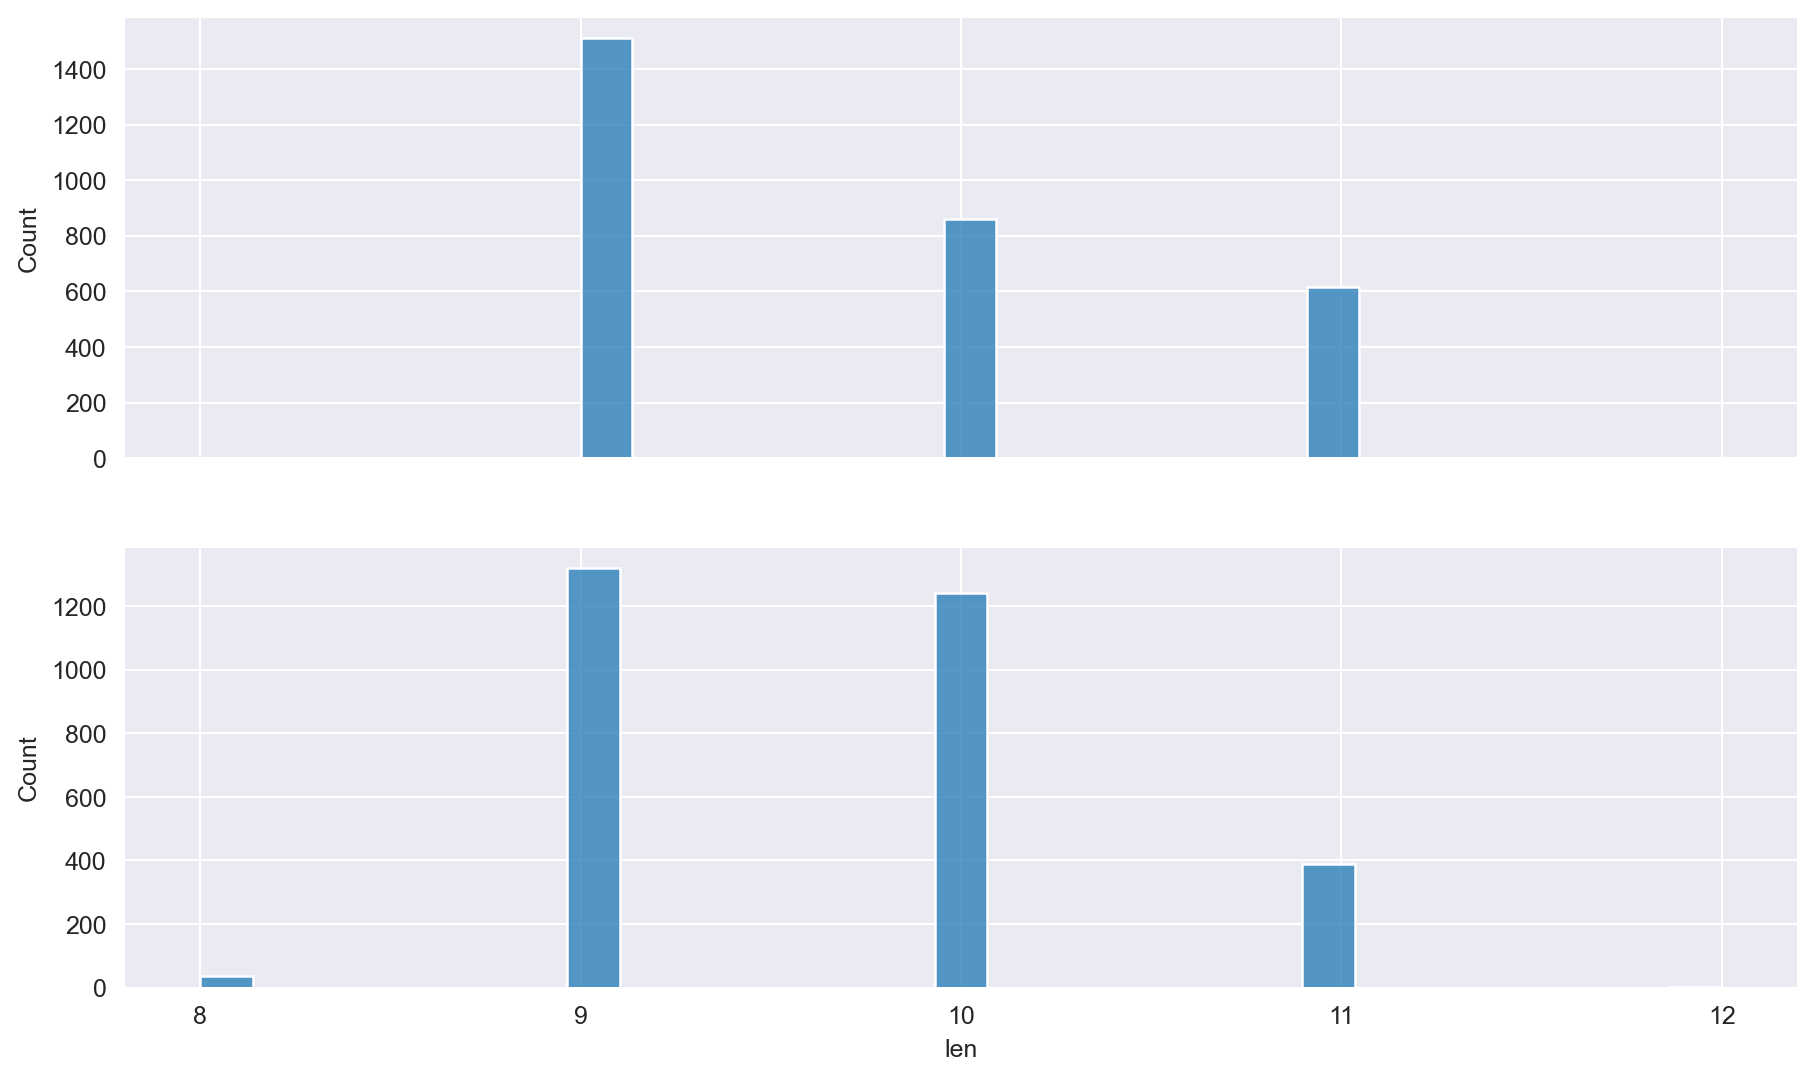

In [51]:
from src.utils import 
f,a = plt.subplots(2, 1, figsize=(12,7), sharex=True)
a = a.ravel()
sns.histplot(cedar, x='len', ax=a[0])
sns.histplot(prime, x='len', ax=a[1])
a[1].set_xticks([8, 9, 10, 11, 12])

In [44]:
cedar['Peptide'].apply(len).describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

count    2988.000000
mean        9.701807
std         0.790662
min         9.000000
10%         9.000000
25%         9.000000
50%         9.000000
75%        10.000000
80%        11.000000
90%        11.000000
95%        11.000000
99%        11.000000
max        12.000000
Name: Peptide, dtype: float64

In [43]:
prime['Peptide'].apply(len).describe()

count    2992.000000
mean        9.664439
std         0.714537
min         8.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        12.000000
Name: Peptide, dtype: float64

In [40]:
cedar['len'].describe()

count    2988.000000
mean        9.701807
std         0.790662
min         9.000000
25%         9.000000
50%         9.000000
75%        10.000000
max        12.000000
Name: len, dtype: float64

In [35]:
v.mean(axis=0)[w], c.mean(axis=0)[w]

(0.006958562513318169, 0.013640526597994496)

In [13]:
cedar.HLA.unique(), len(cedar.HLA.unique())

(array(['HLA-B0702', 'HLA-A0201', 'HLA-A1101', 'HLA-C1203', 'HLA-A0206',
        'HLA-B0801', 'HLA-B4002', 'HLA-B4403', 'HLA-B4408', 'HLA-B4402',
        'HLA-B4001', 'HLA-A6801', 'HLA-A2402', 'HLA-B3501', 'HLA-B1501',
        'HLA-A0301', 'HLA-A1102', 'HLA-A0202', 'HLA-B2705', 'HLA-C0702',
        'HLA-B5701', 'HLA-A3001', 'HLA-A6802', 'HLA-A0205', 'HLA-A0203',
        'HLA-A0101', 'HLA-C1403', 'HLA-B5101', 'HLA-A2501', 'HLA-B1801',
        'HLA-C0602', 'HLA-C0102', 'HLA-A2601', 'HLA-A3301', 'HLA-B3801',
        'HLA-A3101', 'HLA-A2902', 'HLA-C0303', 'HLA-C0501', 'HLA-A0224',
        'HLA-B5401', 'HLA-B3901', 'HLA-C0304', 'HLA-B5601', 'HLA-C0802',
        'HLA-A0211', 'HLA-C1502', 'HLA-B3701', 'HLA-A0210', 'HLA-B4102',
        'HLA-C1202', 'HLA-C0401', 'HLA-B1302', 'HLA-C0701', 'HLA-A3002',
        'HLA-B3503', 'HLA-B5201', 'HLA-B3906', 'HLA-B4901', 'HLA-A6901',
        'HLA-C1402', 'HLA-A0302', 'HLA-B3704'], dtype=object),
 63)

In [14]:
prime.HLA.unique(), len(prime.HLA.unique())

(array(['HLA-B0702', 'HLA-A1101', 'HLA-A0301', 'HLA-B1501', 'HLA-A6801',
        'HLA-C0303', 'HLA-A3101', 'HLA-B3501', 'HLA-B4403', 'HLA-A2402',
        'HLA-A3301', 'HLA-C0602', 'HLA-A0201', 'HLA-A0206', 'HLA-A0101',
        'HLA-A0211', 'HLA-C1502', 'HLA-A6901', 'HLA-A6802', 'HLA-C0702',
        'HLA-B5101', 'HLA-A2601', 'HLA-C1403', 'HLA-B1801', 'HLA-B0801',
        'HLA-C0701', 'HLA-B2705', 'HLA-C0102', 'HLA-A2501', 'HLA-B4402',
        'HLA-B3801', 'HLA-C1203', 'HLA-B5601', 'HLA-C0304', 'HLA-B3901',
        'HLA-C0802', 'HLA-A3001', 'HLA-B3701', 'HLA-C0501', 'HLA-B4102',
        'HLA-A2902', 'HLA-C0401', 'HLA-B3503', 'HLA-B4001', 'HLA-B3906',
        'HLA-B4901', 'HLA-B2702', 'HLA-B5701'], dtype=object),
 48)

In [17]:
prime.HLA.unique(), len(prime.HLA.unique())

(array(['HLA-B0702', 'HLA-A1101', 'HLA-A0301', 'HLA-B1501', 'HLA-A6801',
        'HLA-C0303', 'HLA-A3101', 'HLA-B3501', 'HLA-B4403', 'HLA-A2402',
        'HLA-A3301', 'HLA-C0602', 'HLA-A0201', 'HLA-A0206', 'HLA-A0101',
        'HLA-A0211', 'HLA-C1502', 'HLA-A6901', 'HLA-C0702', 'HLA-B5101',
        'HLA-A2601', 'HLA-C1403', 'HLA-B1801', 'HLA-B0801', 'HLA-C0701',
        'HLA-B2705', 'HLA-A2501', 'HLA-B4402', 'HLA-B3801', 'HLA-B3901',
        'HLA-C0802', 'HLA-C0501', 'HLA-A3001', 'HLA-C0401', 'HLA-B4001',
        'HLA-C0304', 'HLA-B2702', 'HLA-A6802'], dtype=object),
 38)

In [21]:
cp_common = [x for x in prime.HLA.unique() if x in cedar.HLA.unique()]
cpf_common = [x for x in prime_filt.HLA.unique() if x in cedar.HLA.unique()]

In [22]:
len(cp_common), len(cpf

(47, 37)

In [9]:
df.Peptide.apply(len).describe()

count    754.000000
mean      20.018568
std        0.161911
min       20.000000
25%       20.000000
50%       20.000000
75%       20.000000
max       22.000000
Name: Peptide, dtype: float64